# Dubai Properties

#### Данные
- trans_group_en – тип транзакции (покупка/подарок/ипотека)
- procedure_name_en – тип процедуры покупки
- instance_date – дата покупки
- property_type_en – тип объекта недвижимости
- property_sub_type_en – подтип объекта недвижимости
- property_usage_en – назначение объекта недвижимости
- reg_type_en – тип готовности объекта
- area_name_en – название района/города в Дубае
- building_name_en – название здания
- project_name_en – название ЖК
- master_project_en – название проекта
- nearest_landmark_en – ближайшая достопримечательность
- nearest_metro_en – ближайшее метро
- nearest_mall_en – ближайший ТРЦ
- rooms_en – количество комнат
- has_parking – есть ли паркинг
- procedure_area – площадь
- actual_worth – стоимость
- meter_sale_price – стоимость за квадратный метр

#### TODO
- [x] Импорт данных
- [x] Очистка данных
- [x] Описательная статистика
- [x] Обогащение данными
- [x] Линейная регрессия
- [ ] Neural network
- [ ] Random Forest
- [X] CatBoost
- [ ] Spatio Temporal Lag
- [ ] UI

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Импортирование данных

DF = pd.read_csv('Transactions.csv')

In [3]:
# Выводим датасет и убеждаемся, что все импортировалось как нужно

DF.head(5)

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
0,1-11-2001-165,11,1,مبايعات,Sales,بيع,Sell,24-02-2001,1,أرض,...,NaN,0,1393.55,1350000.0,968.75,NaN,NaN,1.0,1.0,0.0
1,3-9-2004-223,9,3,هبات,Gifts,هبه,Grant,13-12-2004,4,فيلا,...,NaN,0,1728.00,2790000.0,1614.58,NaN,NaN,1.0,1.0,0.0
2,2-13-1996-119,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,12-03-2001,1,أرض,...,NaN,0,929.03,20000000.0,21527.83,NaN,NaN,1.0,1.0,0.0
3,2-14-2005-222,14,2,رهون,Mortgages,تعديل رهن,Modify Mortgage,20-09-2005,2,مبنى,...,NaN,0,2673.28,25000000.0,9351.81,NaN,NaN,1.0,1.0,0.0
4,3-9-2012-874,9,3,هبات,Gifts,هبه,Grant,11-10-2012,4,فيلا,...,NaN,0,1541.17,9000000.0,5839.72,NaN,NaN,1.0,1.0,0.0


In [4]:
# Оставляем только необходимые нам столбцы

DF = DF[[
    'trans_group_en', 
    'procedure_name_en', 
    'instance_date', 
    'property_sub_type_en', 
    'property_usage_en', 
    'reg_type_en',
    'area_name_en',
    'master_project_en',
    'nearest_landmark_en',
    'nearest_metro_en',
    'nearest_mall_en',
    'rooms_en',
    'has_parking',
    'procedure_area',
    'actual_worth',
]]

In [5]:
# Выводим свойства столбцов датасета

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042784 entries, 0 to 1042783
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   trans_group_en        1042784 non-null  object 
 1   procedure_name_en     1042784 non-null  object 
 2   instance_date         1042779 non-null  object 
 3   property_sub_type_en  801949 non-null   object 
 4   property_usage_en     1042784 non-null  object 
 5   reg_type_en           1042784 non-null  object 
 6   area_name_en          1042784 non-null  object 
 7   master_project_en     860496 non-null   object 
 8   nearest_landmark_en   919586 non-null   object 
 9   nearest_metro_en      806914 non-null   object 
 10  nearest_mall_en       801606 non-null   object 
 11  rooms_en              793189 non-null   object 
 12  has_parking           1042784 non-null  int64  
 13  procedure_area        1042784 non-null  float64
 14  actual_worth          1038984 non-

In [6]:
# Очистка данных

DF.dropna(inplace=True)

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555564 entries, 760 to 1042781
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trans_group_en        555564 non-null  object 
 1   procedure_name_en     555564 non-null  object 
 2   instance_date         555564 non-null  object 
 3   property_sub_type_en  555564 non-null  object 
 4   property_usage_en     555564 non-null  object 
 5   reg_type_en           555564 non-null  object 
 6   area_name_en          555564 non-null  object 
 7   master_project_en     555564 non-null  object 
 8   nearest_landmark_en   555564 non-null  object 
 9   nearest_metro_en      555564 non-null  object 
 10  nearest_mall_en       555564 non-null  object 
 11  rooms_en              555564 non-null  object 
 12  has_parking           555564 non-null  int64  
 13  procedure_area        555564 non-null  float64
 14  actual_worth          555564 non-null  float64
dt

## 2. Обогащение данными

### 2.1 Геокодинг
В рамках геокодинга добавим:
- координаты объекта
- расстояние до метро
- расстояние до ТРЦ
- расстояние до ближайшей достопримечательности

In [8]:
# Импортируем библиотеки геокодинга

from geopy.geocoders import Nominatim
from geopy import distance

In [9]:
# Уникальные названия ЖК, по ним будем искать их координаты

print(DF['master_project_en'].unique())

['Springs - 7' 'Springs - 5' 'Springs - 1' 'Springs - 2' 'Springs - 3'
 'Springs - 6' 'Springs - 4' 'Lakes - Maeen' 'Lakes - Forat' 'Motor City'
 'Lakes - Ghadeer' 'Jumeirah Village Circle' 'Palm Jumeirah'
 'Dubai Investment Park First' 'Uptown Mirdif' 'Al Furjan'
 'DUBAI HILLS - MAPLE 1' 'DUBAI HILLS - MAPLE 2' 'DUBAI HILLS - MAPLE 3'
 'DUBAI HILLS - CLUB VILLAS' 'DUBAI HILLS - GOLF GROVE'
 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7' 'The Greens'
 'Dubai Marina' 'Jumeriah Beach Residence  - JBR'
 'International City Phase 1' 'Burj Khalifa' 'Jumeirah Lakes Towers'
 'TECOM Site C' 'Discovery Gardens' 'International Media Production Zone'
 'Dubai Sports City' 'Business Bay' 'Dubiotech' 'Festival City' 'Arjan'
 'Jumeirah Heights' 'Down Town Jabal Ali' 'Jumeirah Village Triangle'
 'TECOM Site B' 'Jumeirah Islands' 'Dubai Studio City'
 'DUBAI HILLS - PARK' 'Culture Village' 'Meydan' 'The Lagoons'
 'TECOM Site A' 'Dubai Health Care City Phase 1' 'Jumeirah Golf'
 'City Walk' 'DUBAI HILLS'

In [10]:
# Инициализируем геолокатор

geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

In [11]:
# Сформируем отдельный датасеты для геокодинга, тк основной датасет очень большой

DF_master_project = pd.DataFrame({
    "master_project_en": DF['master_project_en'].unique()
})

DF_metro = pd.DataFrame({
    "nearest_metro_en": DF['nearest_metro_en'].unique()
})

DF_landmark = pd.DataFrame({
    "nearest_landmark_en": DF['nearest_landmark_en'].unique()
})

DF_mall = pd.DataFrame({
    "nearest_mall_en": DF['nearest_mall_en'].unique()
})

In [12]:
# Добавим новый столбец с полным адресом и сделаем геокодинг

DF_master_project['full_address'] = DF_master_project.master_project_en + ', Dubai, United Arab Emirates'
DF_master_project['gcode'] = DF_master_project.full_address.apply(geolocator.geocode)

DF_metro['full_address'] = DF_metro.nearest_metro_en + ', Dubai, United Arab Emirates'
DF_metro['gcode'] = DF_metro.full_address.apply(geolocator.geocode)

DF_landmark['full_address'] = DF_landmark.nearest_landmark_en + ', Dubai, United Arab Emirates'
DF_landmark['gcode'] = DF_landmark.full_address.apply(geolocator.geocode)

DF_mall['full_address'] = DF_mall.nearest_mall_en + ', Dubai, United Arab Emirates'
DF_mall['gcode'] = DF_mall.full_address.apply(geolocator.geocode)

In [13]:
# Добавим координаты широты и долготы

DF_master_project['lat'] = [None if g is None else g.latitude for g in DF_master_project.gcode]
DF_master_project['long'] = [None if g is None else g.longitude or None for g in DF_master_project.gcode]

DF_metro['lat'] = [None if g is None else g.latitude for g in DF_metro.gcode]
DF_metro['long'] = [None if g is None else g.longitude or None for g in DF_metro.gcode]

DF_landmark['lat'] = [None if g is None else g.latitude for g in DF_landmark.gcode]
DF_landmark['long'] = [None if g is None else g.longitude or None for g in DF_landmark.gcode]

DF_mall['lat'] = [None if g is None else g.latitude for g in DF_mall.gcode]
DF_mall['long'] = [None if g is None else g.longitude or None for g in DF_mall.gcode]

DF_master_project

,master_project_en,full_address,gcode,lat,long
0,Springs - 7,"Springs - 7, Dubai, United Arab Emirates","(الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...",25.063880,55.191513
1,Springs - 5,"Springs - 5, Dubai, United Arab Emirates","(الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...",25.064057,55.187041
2,Springs - 1,"Springs - 1, Dubai, United Arab Emirates","(الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...",25.061119,55.160821
3,Springs - 2,"Springs - 2, Dubai, United Arab Emirates","(الينابيع 2, دبي, الإمارات العربية المتحدة, (2...",25.057409,55.167019
4,Springs - 3,"Springs - 3, Dubai, United Arab Emirates","(الينابيع 3, دبي, الإمارات العربية المتحدة, (2...",25.057884,55.176046
...,...,...,...,...,...
66,Lakes - Hattan II,"Lakes - Hattan II, Dubai, United Arab Emirates",None,NaN,NaN
67,Meadows 7,"Meadows 7, Dubai, United Arab Emirates","(Meadows 7, مركز دبي المالي العالمي, دبي, الإم...",25.062077,55.178963
68,Meadows 2,"Meadows 2, Dubai, United Arab Emirates","(ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...",25.069485,55.151440
69,Emirates Hills,"Emirates Hills, Dubai, United Arab Emirates","(Emirates Hills, تلال الإمارات, دبي, الإمارات ...",25.067788,55.183385


In [14]:
# Вручную добавим недостающие координаты для ЖК

DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'lat'] = 25.033542993655033
DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'long'] = 55.18917001485356
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'lat'] = 25.097428719611617
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'long'] = 55.17756110264013
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'lat'] = 24.96105936394376
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'long'] = 55.08270192949124
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'lat'] = 25.094272787442044
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'long'] = 55.175560083372986
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'lat'] = 25.000211714542417
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'long'] = 55.16834169258494
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'lat'] = 25.19770179006602
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'long'] = 55.355695124267285
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'lat'] = 25.09214442690163
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'long'] = 55.15783349732667
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'lat'] = 25.083137305514395 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'long'] = 55.139013137811546
DF_master_project.at[24, 'lat'] = 25.083137305514395 
DF_master_project.at[24, 'long'] = 55.139013137811546
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'lat'] = 25.23606273566597
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'long'] = 55.32270853013264
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'lat'] = 25.232945714600916
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'long'] = 55.32351188330427
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'lat'] = 25.19949550070485 
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'long'] = 55.27392556849345
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'lat'] = 25.07247559744288 
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'long'] = 55.1392704930149
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'lat'] = 25.081750780370683 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'long'] = 55.16575089175726
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'lat'] = 25.09335555736875
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'long'] = 55.25403781082174
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'lat'] = 25.098416484757895
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'long'] = 55.25332656664681
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'lat'] = 25.10582583562555
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'long'] = 55.255374215092395
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'lat'] = 25.195915926712992
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'long'] = 55.277645310842416 

DF_master_project

,master_project_en,full_address,gcode,lat,long
0,Springs - 7,"Springs - 7, Dubai, United Arab Emirates","(الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...",25.063880,55.191513
1,Springs - 5,"Springs - 5, Dubai, United Arab Emirates","(الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...",25.064057,55.187041
2,Springs - 1,"Springs - 1, Dubai, United Arab Emirates","(الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...",25.061119,55.160821
3,Springs - 2,"Springs - 2, Dubai, United Arab Emirates","(الينابيع 2, دبي, الإمارات العربية المتحدة, (2...",25.057409,55.167019
4,Springs - 3,"Springs - 3, Dubai, United Arab Emirates","(الينابيع 3, دبي, الإمارات العربية المتحدة, (2...",25.057884,55.176046
...,...,...,...,...,...
66,Lakes - Hattan II,"Lakes - Hattan II, Dubai, United Arab Emirates",None,25.081751,55.165751
67,Meadows 7,"Meadows 7, Dubai, United Arab Emirates","(Meadows 7, مركز دبي المالي العالمي, دبي, الإم...",25.062077,55.178963
68,Meadows 2,"Meadows 2, Dubai, United Arab Emirates","(ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...",25.069485,55.151440
69,Emirates Hills,"Emirates Hills, Dubai, United Arab Emirates","(Emirates Hills, تلال الإمارات, دبي, الإمارات ...",25.067788,55.183385


In [15]:
DF_metro

,nearest_metro_en,full_address,gcode,lat,long
0,Damac Properties,"Damac Properties, Dubai, United Arab Emirates","(دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...",25.079953,55.147594
1,Nakheel Metro Station,"Nakheel Metro Station, Dubai, United Arab Emir...",None,NaN,NaN
2,Dubai Internet City,"Dubai Internet City, Dubai, United Arab Emirates","(Dubai Internet City, قرية المعرفة, دبي, الإما...",25.095598,55.161734
3,Mina Seyahi,"Mina Seyahi, Dubai, United Arab Emirates","(الميناء السياحي Mina Seyahi, شارع الملك سلمان...",25.091045,55.148646
4,DANUBE Metro Station,"DANUBE Metro Station, Dubai, United Arab Emirates","(Danube Metro Station, شارع الشيخ زايد, جبل عل...",25.001297,55.095679
5,Ibn Battuta Metro Station,"Ibn Battuta Metro Station, Dubai, United Arab ...",(Bus E55 to Ibn Battuta Metro Station (every h...,24.885431,55.158962
6,Rashidiya Metro Station,"Rashidiya Metro Station, Dubai, United Arab Em...","(Rashidiya Metro Station Car Park (Red Line), ...",25.229569,55.391476
7,First Abu Dhabi Bank Metro Station,"First Abu Dhabi Bank Metro Station, Dubai, Uni...",None,NaN,NaN
8,Noor Bank Metro Station,"Noor Bank Metro Station, Dubai, United Arab Em...",None,NaN,NaN
9,ENERGY Metro Station,"ENERGY Metro Station, Dubai, United Arab Emirates","(Energy Metro Station, شارع الشيخ زايد, جبل عل...",25.026321,55.101285


In [16]:
# Вручную добавим недостающие координаты для метро

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'lat'] = 25.079982099455968
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'long'] = 55.138149278107555

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'lat'] = 25.076428135523372
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'long'] = 55.14197616849133

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'lat'] = 25.201611651560157
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'long'] = 55.26950781266849

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'lat'] = 25.08899029789469 
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'long'] = 55.15809260783653

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'lat'] = 25.074385143932265
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'long'] = 55.132397009931175

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'lat'] = 25.19145596093731
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'long'] = 55.26030076849341

DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'lat'] = 25.120000197937358
DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'long'] = 55.19958610120157

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'lat'] = 25.225180015939067
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'long'] = 55.33365092616389

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'lat'] = 25.219379082537397
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'long'] = 55.33883459548382

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'lat'] = 25.23107478400269
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'long'] = 55.32279349732888

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'lat'] = 25.2337450495845
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'long'] = 55.29209721082395

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'lat'] = 25.155942586558552
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'long'] = 55.22849041082285

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'lat'] = 25.265013251747984
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'long'] = 55.287912496065125

DF_metro

,nearest_metro_en,full_address,gcode,lat,long
0,Damac Properties,"Damac Properties, Dubai, United Arab Emirates","(دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...",25.079953,55.147594
1,Nakheel Metro Station,"Nakheel Metro Station, Dubai, United Arab Emir...",None,25.088990,55.158093
2,Dubai Internet City,"Dubai Internet City, Dubai, United Arab Emirates","(Dubai Internet City, قرية المعرفة, دبي, الإما...",25.095598,55.161734
3,Mina Seyahi,"Mina Seyahi, Dubai, United Arab Emirates","(الميناء السياحي Mina Seyahi, شارع الملك سلمان...",25.091045,55.148646
4,DANUBE Metro Station,"DANUBE Metro Station, Dubai, United Arab Emirates","(Danube Metro Station, شارع الشيخ زايد, جبل عل...",25.001297,55.095679
5,Ibn Battuta Metro Station,"Ibn Battuta Metro Station, Dubai, United Arab ...",(Bus E55 to Ibn Battuta Metro Station (every h...,24.885431,55.158962
6,Rashidiya Metro Station,"Rashidiya Metro Station, Dubai, United Arab Em...","(Rashidiya Metro Station Car Park (Red Line), ...",25.229569,55.391476
7,First Abu Dhabi Bank Metro Station,"First Abu Dhabi Bank Metro Station, Dubai, Uni...",None,25.120000,55.199586
8,Noor Bank Metro Station,"Noor Bank Metro Station, Dubai, United Arab Em...",None,25.155943,55.228490
9,ENERGY Metro Station,"ENERGY Metro Station, Dubai, United Arab Emirates","(Energy Metro Station, شارع الشيخ زايد, جبل عل...",25.026321,55.101285


In [17]:
DF_landmark

,nearest_landmark_en,full_address,gcode,lat,long
0,Sports City Swimming Academy,"Sports City Swimming Academy, Dubai, United Ar...",None,NaN,NaN
1,Burj Al Arab,"Burj Al Arab, Dubai, United Arab Emirates","(برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...",25.141263,55.185404
2,Motor City,"Motor City, Dubai, United Arab Emirates","(Motor City, موتور سيتي, دبي, الإمارات العربية...",25.047102,55.238270
3,Expo 2020 Site,"Expo 2020 Site, Dubai, United Arab Emirates",None,NaN,NaN
4,Dubai International Airport,"Dubai International Airport, Dubai, United Ara...","(مطار دبي الدولي, 3b شارع, Al Qusais 2, Dubai,...",25.252129,55.365716
5,Global Village,"Global Village, Dubai, United Arab Emirates","(Global village, Indian Chaat Bazaar, وادي الص...",25.069410,55.311058
6,IMG World Adventures,"IMG World Adventures, Dubai, United Arab Emirates",None,NaN,NaN
7,Downtown Dubai,"Downtown Dubai, Dubai, United Arab Emirates","(وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...",25.186886,55.274800
8,Burj Khalifa,"Burj Khalifa, Dubai, United Arab Emirates","(برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...",25.197031,55.274222


In [18]:
# Вручную добавим недостающие координаты для достопримечательностей

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'lat'] = 25.042132693409545
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'long'] = 55.21952377218269

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'lat'] = 24.967218956410264 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'long'] = 55.15768472638599

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'lat'] = 25.082279418420768 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'long'] = 55.3180615792579

DF_landmark

,nearest_landmark_en,full_address,gcode,lat,long
0,Sports City Swimming Academy,"Sports City Swimming Academy, Dubai, United Ar...",None,25.042133,55.219524
1,Burj Al Arab,"Burj Al Arab, Dubai, United Arab Emirates","(برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...",25.141263,55.185404
2,Motor City,"Motor City, Dubai, United Arab Emirates","(Motor City, موتور سيتي, دبي, الإمارات العربية...",25.047102,55.238270
3,Expo 2020 Site,"Expo 2020 Site, Dubai, United Arab Emirates",None,24.967219,55.157685
4,Dubai International Airport,"Dubai International Airport, Dubai, United Ara...","(مطار دبي الدولي, 3b شارع, Al Qusais 2, Dubai,...",25.252129,55.365716
5,Global Village,"Global Village, Dubai, United Arab Emirates","(Global village, Indian Chaat Bazaar, وادي الص...",25.069410,55.311058
6,IMG World Adventures,"IMG World Adventures, Dubai, United Arab Emirates",None,25.082279,55.318062
7,Downtown Dubai,"Downtown Dubai, Dubai, United Arab Emirates","(وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...",25.186886,55.274800
8,Burj Khalifa,"Burj Khalifa, Dubai, United Arab Emirates","(برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...",25.197031,55.274222


In [19]:
DF_mall

,nearest_mall_en,full_address,gcode,lat,long
0,Marina Mall,"Marina Mall, Dubai, United Arab Emirates","(Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...",25.075874,55.141919
1,Mall of the Emirates,"Mall of the Emirates, Dubai, United Arab Emirates","(مول الإمارات, 1, شارع السيداف ١, البرشاء 1, ا...",25.118244,55.200362
2,Ibn-e-Battuta Mall,"Ibn-e-Battuta Mall, Dubai, United Arab Emirates",None,NaN,NaN
3,City Centre Mirdif,"City Centre Mirdif, Dubai, United Arab Emirates","(P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...",25.217343,55.407129
4,Dubai Mall,"Dubai Mall, Dubai, United Arab Emirates","(دبي مول, شارع المركز المالي, وسط مدينة دبي, د...",25.197096,55.279025


In [20]:
# Вручную добавим недостающие координаты для ТРЦ

DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'lat'] = 25.0447415858032
DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'long'] = 55.12027573965596

DF_mall

,nearest_mall_en,full_address,gcode,lat,long
0,Marina Mall,"Marina Mall, Dubai, United Arab Emirates","(Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...",25.075874,55.141919
1,Mall of the Emirates,"Mall of the Emirates, Dubai, United Arab Emirates","(مول الإمارات, 1, شارع السيداف ١, البرشاء 1, ا...",25.118244,55.200362
2,Ibn-e-Battuta Mall,"Ibn-e-Battuta Mall, Dubai, United Arab Emirates",None,25.044742,55.120276
3,City Centre Mirdif,"City Centre Mirdif, Dubai, United Arab Emirates","(P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...",25.217343,55.407129
4,Dubai Mall,"Dubai Mall, Dubai, United Arab Emirates","(دبي مول, شارع المركز المالي, وسط مدينة دبي, د...",25.197096,55.279025


Теперь у нас есть дополнительные 4 датасета, которые содержат в себе координаты объектов.
На основе этих координат мы можем обогатить основной датасет расстояниями от ЖК до:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

### 2.2 Обогащение данными
В основной датасет добавим расстояния:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

In [21]:
# Добавим в основной датасет столбец с расстоянием до метро/достопримечательности/трц

distance_to_metro_col = []
distance_to_landmark_col = []
distance_to_mall_col = []


for index, row in DF.iterrows():
    # master_project
    master_project_match = DF_master_project.loc[row['master_project_en'] == DF_master_project['master_project_en']]
    master_project_lat = master_project_match.lat.values[0]
    master_project_long = master_project_match.long.values[0]
    master_project_coordinates = (master_project_lat, master_project_long)
    
    # metro
    metro_match = DF_metro.loc[row['nearest_metro_en'] == DF_metro['nearest_metro_en']]
    metro_lat = metro_match.lat.values[0]
    metro_long = metro_match.long.values[0]
    metro_coordinates = (metro_lat, metro_long)
    distance_to_metro = distance.distance(master_project_coordinates, metro_coordinates).m
    distance_to_metro_col.append(distance_to_metro)
    
    # landmark
    landmark_match = DF_landmark.loc[row['nearest_landmark_en'] == DF_landmark['nearest_landmark_en']]
    landmark_lat = landmark_match.lat.values[0]
    landmark_long = landmark_match.long.values[0]
    landmark_coordinates = (landmark_lat, landmark_long)
    distance_to_landmark = distance.distance(master_project_coordinates, landmark_coordinates).m
    distance_to_landmark_col.append(distance_to_landmark)
    
    # mall
    mall_match = DF_mall.loc[row['nearest_mall_en'] == DF_mall['nearest_mall_en']]
    mall_lat = mall_match.lat.values[0]
    mall_long = mall_match.long.values[0]
    mall_coordinates = (mall_lat, mall_long)
    distance_to_mall = distance.distance(master_project_coordinates, mall_coordinates).m
    distance_to_mall_col.append(distance_to_mall)
    
DF['distance_to_metro'] = distance_to_metro_col
DF['distance_to_landmark'] = distance_to_landmark_col
DF['distance_to_mall'] = distance_to_mall_col


DF


,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,actual_worth,distance_to_metro,distance_to_landmark,distance_to_mall
760,Mortgages,Mortgage Registration,30-03-2010,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,1505000.0,4775.360648,3713.843980,5177.005216
761,Mortgages,Mortgage Registration,26-10-2015,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,1260000.0,4775.360648,3713.843980,5177.005216
762,Sales,Lease to Own Registration,22-11-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,661888.0,4019.665126,4079.460028,4736.895258
763,Sales,Sell,22-11-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,2300000.0,4019.665126,4079.460028,4736.895258
764,Sales,Sell,01-08-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,1850000.0,4019.665126,4079.460028,4736.895258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042646,Sales,Sell - Pre registration,01-03-2023,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Marina Mall,1 B/R,1,61.36,600000.0,6175.706636,2261.982665,6987.171177
1042647,Sales,Sell - Pre registration,07-02-2023,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Marina Mall,1 B/R,1,64.32,620000.0,6175.706636,2261.982665,6987.171177
1042648,Sales,Sell - Pre registration,07-02-2023,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Marina Mall,1 B/R,1,69.57,695000.0,6175.706636,2261.982665,6987.171177
1042649,Sales,Sell - Pre registration,23-02-2023,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Mall of the Emirates,Studio,1,40.88,639000.0,6175.706636,2261.982665,6493.259126


In [22]:
DF.to_csv('./Transactions_geocoded.csv', index=False)
#DF = pd.read_csv('Transactions_geocoded.csv')

In [23]:
DF.head()

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,actual_worth,distance_to_metro,distance_to_landmark,distance_to_mall
760,Mortgages,Mortgage Registration,30-03-2010,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,1505000.0,4775.360648,3713.843980,5177.005216
761,Mortgages,Mortgage Registration,26-10-2015,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,1260000.0,4775.360648,3713.843980,5177.005216
762,Sales,Lease to Own Registration,22-11-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,661888.0,4019.665126,4079.460028,4736.895258
763,Sales,Sell,22-11-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,2300000.0,4019.665126,4079.460028,4736.895258
764,Sales,Sell,01-08-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,1850000.0,4019.665126,4079.460028,4736.895258


## 3. Статистический анализ

In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555564 entries, 760 to 1042781
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trans_group_en        555564 non-null  object 
 1   procedure_name_en     555564 non-null  object 
 2   instance_date         555564 non-null  object 
 3   property_sub_type_en  555564 non-null  object 
 4   property_usage_en     555564 non-null  object 
 5   reg_type_en           555564 non-null  object 
 6   area_name_en          555564 non-null  object 
 7   master_project_en     555564 non-null  object 
 8   nearest_landmark_en   555564 non-null  object 
 9   nearest_metro_en      555564 non-null  object 
 10  nearest_mall_en       555564 non-null  object 
 11  rooms_en              555564 non-null  object 
 12  has_parking           555564 non-null  int64  
 13  procedure_area        555564 non-null  float64
 14  actual_worth          555564 non-null  float64
 1

In [25]:
# Категоризация переменных

DF['trans_group_en'] = DF['trans_group_en'].astype('category')
DF['procedure_name_en'] = DF['procedure_name_en'].astype('category')
DF['property_sub_type_en'] = DF['property_sub_type_en'].astype('category')
DF['property_usage_en'] = DF['property_usage_en'].astype('category')
DF['reg_type_en'] = DF['reg_type_en'].astype('category')
DF['area_name_en'] = DF['area_name_en'].astype('category')
DF['master_project_en'] = DF['master_project_en'].astype('category')
DF['nearest_landmark_en'] = DF['nearest_landmark_en'].astype('category')
DF['nearest_metro_en'] = DF['nearest_metro_en'].astype('category')
DF['nearest_mall_en'] = DF['nearest_mall_en'].astype('category')
DF['rooms_en'] = DF['rooms_en'].astype('category')
DF['has_parking'] = DF['has_parking'].astype('category')

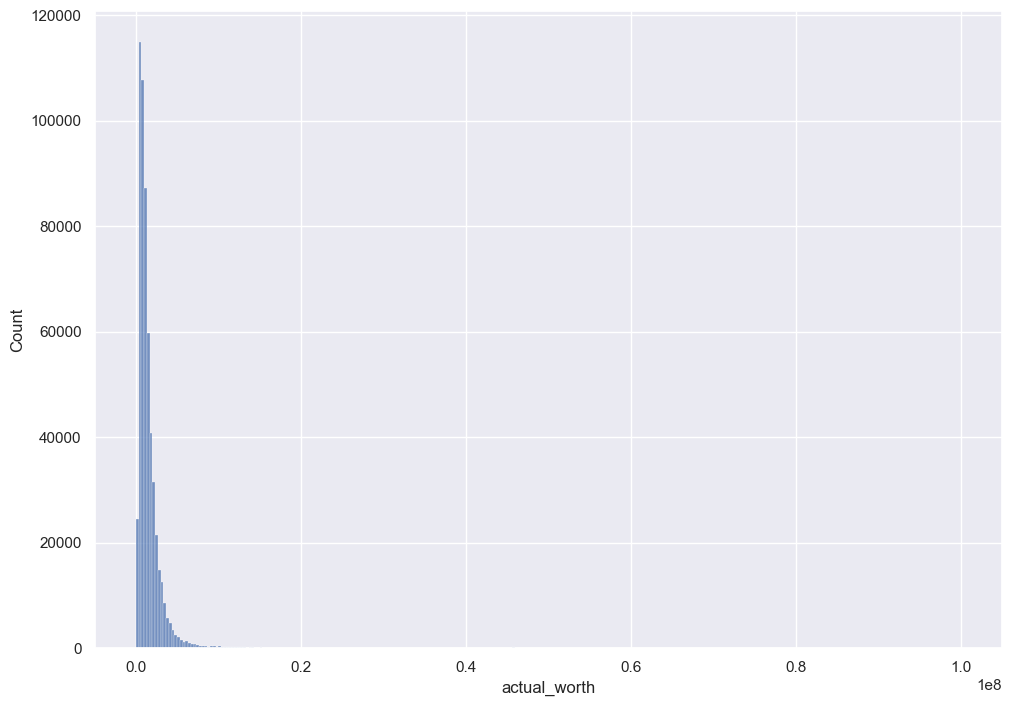

In [26]:
# Проверка на нормальность распределения

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(DF['actual_worth'], bins=300)
plt.show()

<Axes: xlabel='actual_worth'>

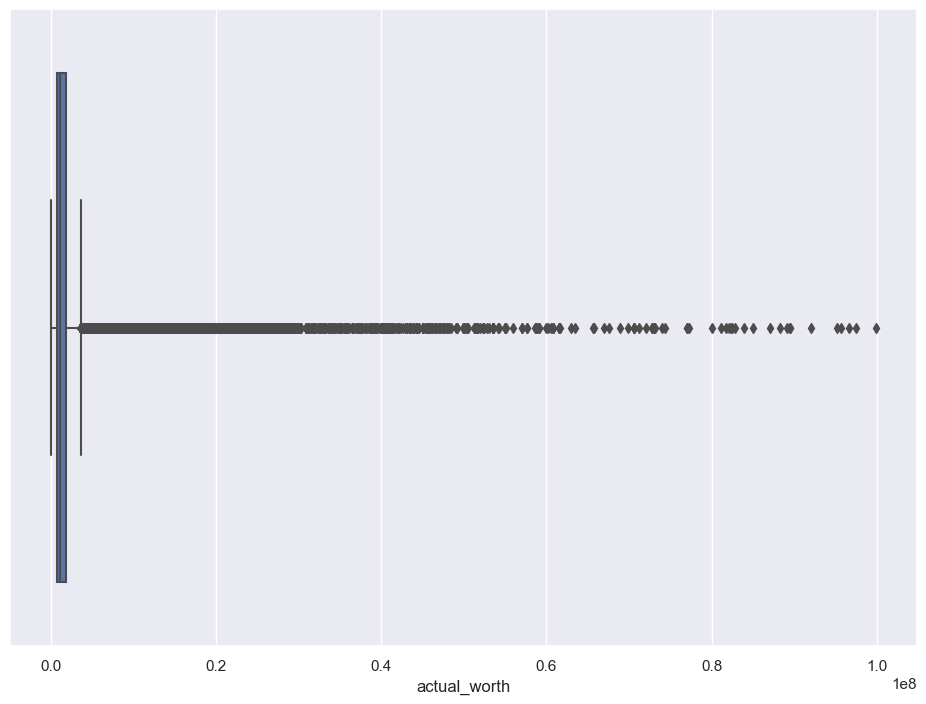

In [27]:
sns.boxplot(x=DF["actual_worth"])

In [28]:
# Функция поиска выбросов

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [29]:
outliers = find_outliers_IQR(DF['actual_worth'])

print('number of rows: '+ str(len(DF['actual_worth'])))

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of rows: 555564
number of outliers: 33935
max outlier value: 99868168.0
min outlier value: 3574109.0


In [30]:
# Избавляемся от выбросов

cols = ['actual_worth'] # one or more

Q1 = DF[cols].quantile(0.25)
Q3 = DF[cols].quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF[cols] < (Q1 - 1.5 * IQR)) |(DF[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='actual_worth'>

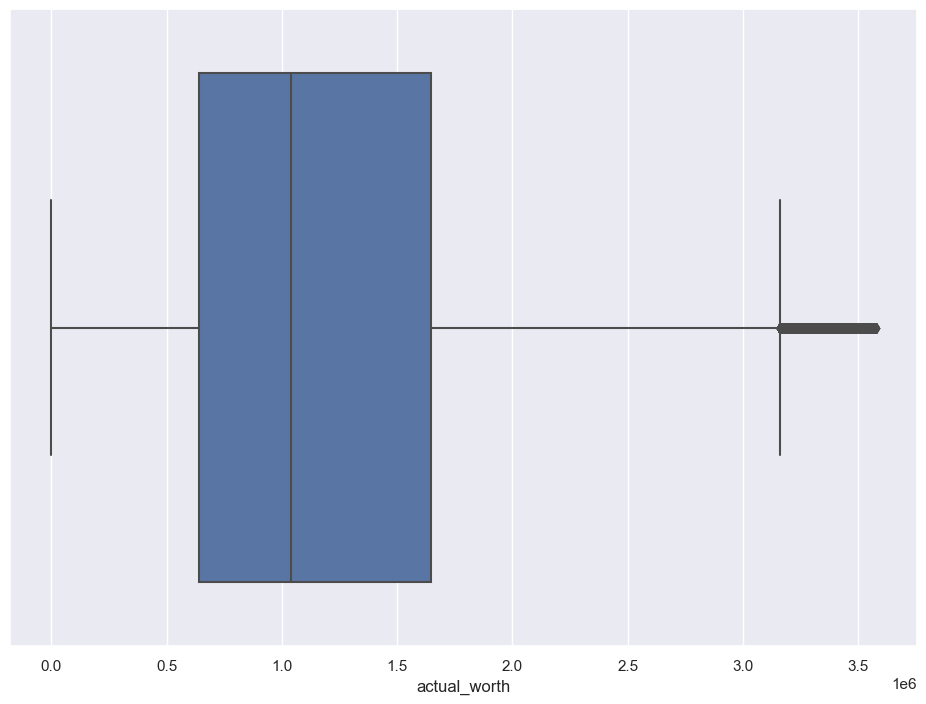

In [31]:
sns.boxplot(x=DF["actual_worth"])

<Axes: xlabel='actual_worth', ylabel='Count'>

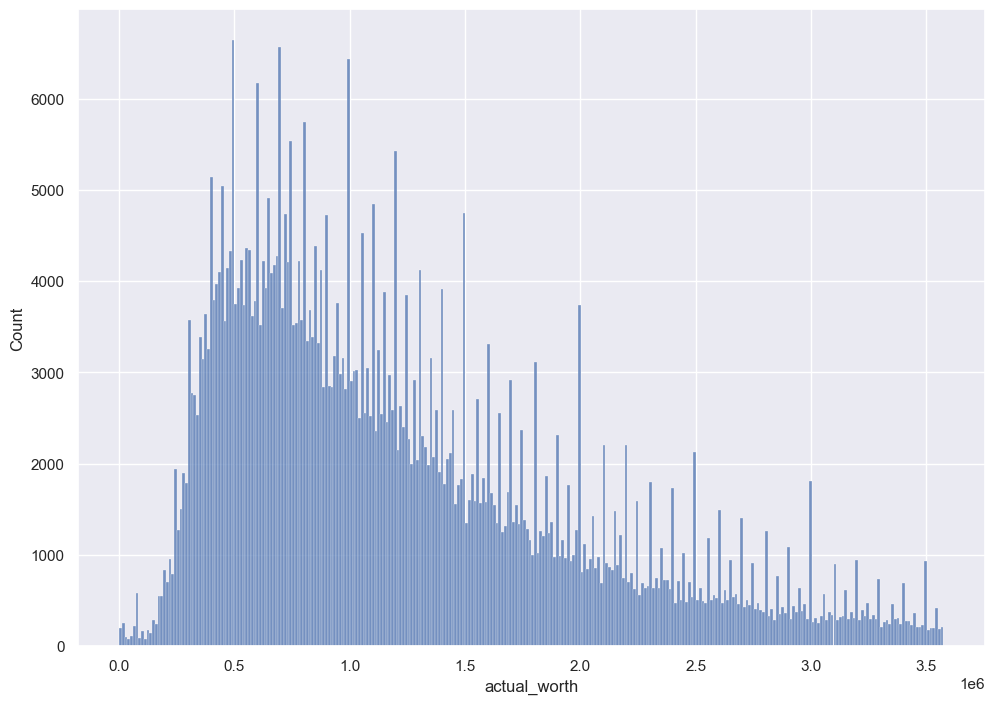

In [32]:
sns.histplot(DF['actual_worth'], bins=300)


### 3.1 Описательная статистика

In [33]:
# Уникальные категории типа транзакции

print(DF['trans_group_en'].unique())

['Mortgages', 'Sales', 'Gifts']
Categories (3, object): ['Gifts', 'Mortgages', 'Sales']


In [34]:
# Период данных

print('Min Date:', DF['instance_date'].min())
print('Max Date:', DF['instance_date'].max())

Min Date: 01-01-2007
Max Date: 31-12-2020


In [35]:
# Уникальные категории подтипа недвижимости

print(DF['property_sub_type_en'].unique())

['Villa', 'Flat', 'Shop', 'Office', 'Hotel Apartment', 'Hotel Rooms', 'Store', 'Gymnasium', 'Show Rooms']
Categories (9, object): ['Flat', 'Gymnasium', 'Hotel Apartment', 'Hotel Rooms', ..., 'Shop', 'Show Rooms', 'Store', 'Villa']


In [36]:
# Уникальные категории типа назначения помещения

print(DF['property_usage_en'].unique())

['Residential', 'Commercial', 'Hospitality ', 'Storage']
Categories (4, object): ['Commercial', 'Hospitality ', 'Residential', 'Storage']


In [37]:
# Уникальные категории типа готовности

print(DF['reg_type_en'].unique())

['Existing Properties', 'Off-Plan Properties']
Categories (2, object): ['Existing Properties', 'Off-Plan Properties']


In [38]:
# Уникальные категории района

print(DF['area_name_en'].unique())

['Al Thanayah Fourth', 'Al Thanyah Third', 'Al Barsha South Fourth', 'Dubai Investment Park First', 'Mirdif', ..., 'Al Wasl', 'Al Kifaf', 'Madinat Dubai Almelaheyah', 'Jabal Ali', 'Wadi Al Safa 6']
Length: 34
Categories (34, object): ['Al Barsha South Fifth', 'Al Barsha South Fourth', 'Al Barshaa South Second', 'Al Barshaa South Third', ..., 'Nad Al Shiba First', 'Palm Jumeirah', 'Um Hurair Second', 'Wadi Al Safa 6']


In [39]:
print(DF['master_project_en'].unique())

['Springs - 7', 'Springs - 5', 'Springs - 1', 'Springs - 2', 'Springs - 3', ..., 'Meadows 8', 'Meadows 7', 'Meadows 2', 'DUBAI HILLS - SIDRA 1', 'Lakes - Hattan II']
Length: 70
Categories (71, object): ['Al Furjan', 'Arabian Ranches - Saheel', 'Arjan', 'Burj Khalifa', ..., 'The Lagoons', 'Uptown Mirdif', 'Wasl 1', 'Wasl Gate']


In [40]:
# Описательная статистика площади

DF['procedure_area'].describe()

count    521629.000000
mean        113.667225
std          87.005146
min           0.130000
25%          65.930000
50%          92.000000
75%         137.400000
max        5339.170000
Name: procedure_area, dtype: float64

In [41]:
# Описательная статистика стоимости

DF['actual_worth'].describe()

count    5.216290e+05
mean     1.228040e+06
std      7.590278e+05
min      1.000000e+00
25%      6.413400e+05
50%      1.038888e+06
75%      1.648565e+06
max      3.574045e+06
Name: actual_worth, dtype: float64

In [42]:
# Описательная статистика расстояния до метро, в метрах

DF['distance_to_metro'].describe()

count    521629.000000
mean       3918.794769
std        5175.395347
min           0.000000
25%         507.877205
50%        1484.960102
75%        6175.706636
max       25307.077838
Name: distance_to_metro, dtype: float64

In [43]:
# Описательная статистика расстояния до достопримечательности, в метрах

DF['distance_to_landmark'].describe()

count    521629.000000
mean       4995.451312
std        3531.801790
min           0.000000
25%        1125.303492
50%        5513.633151
75%        8344.028669
max       18015.564442
Name: distance_to_landmark, dtype: float64

In [44]:
# Описательная статистика расстояния до ТЦ, в метрах

DF['distance_to_mall'].describe()

count    521629.000000
mean       3519.024495
std        3104.143498
min         421.836071
25%         739.178337
50%        1944.033414
75%        6493.259126
max       19082.632348
Name: distance_to_mall, dtype: float64

### 3.2 Корреляция

<Axes: >

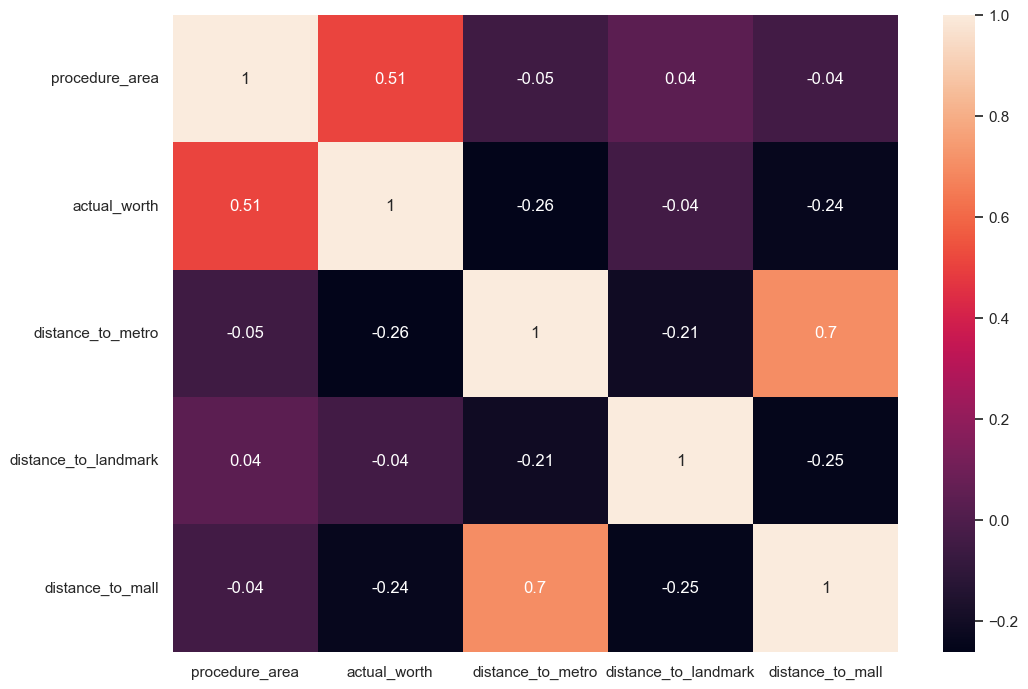

In [45]:
# Корреляция для числовых признаков

correlation_matrix = DF.corr(numeric_only = True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### 3.2 Визуализация

In [349]:
# Размер надписей на графиках
PLOT_LABEL_FONT_SIZE = 14 
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

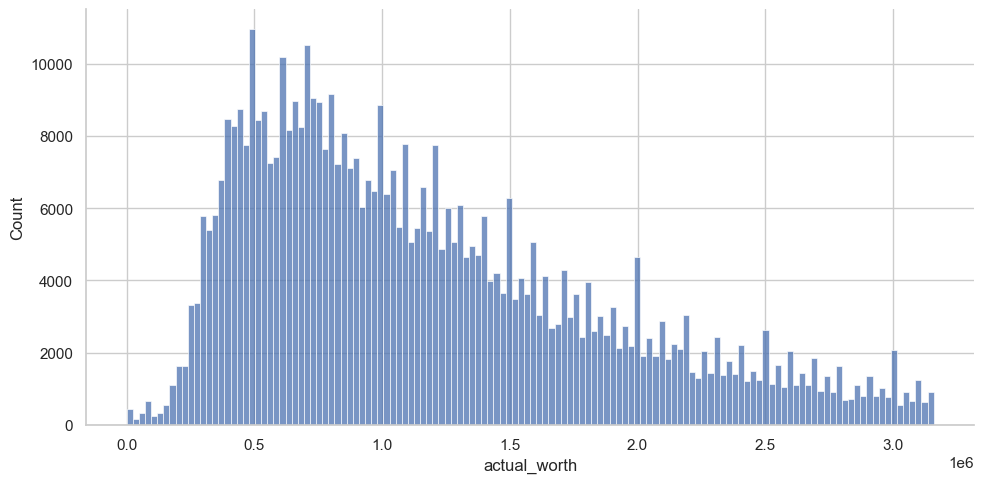

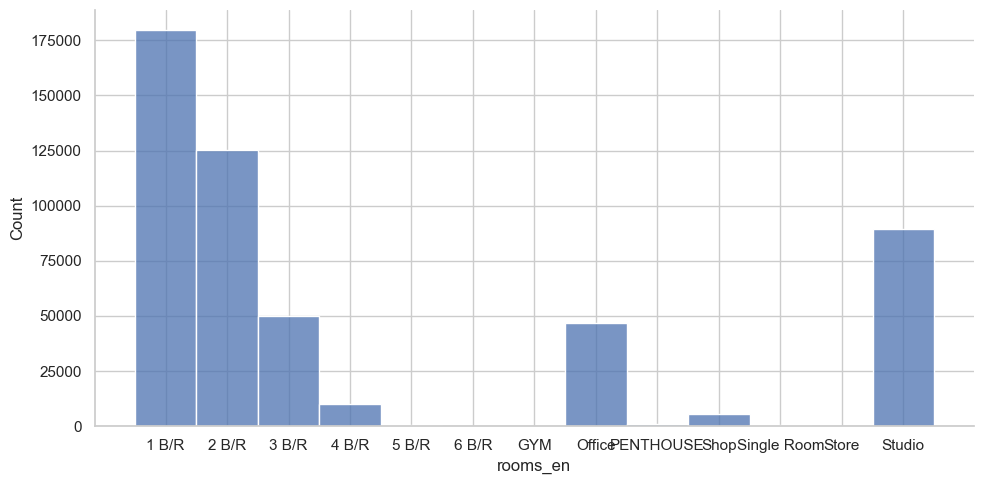

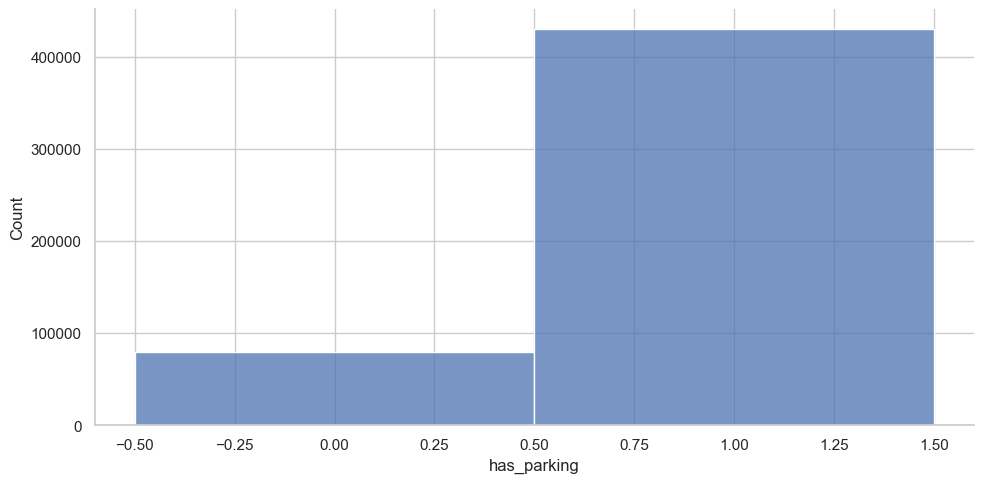

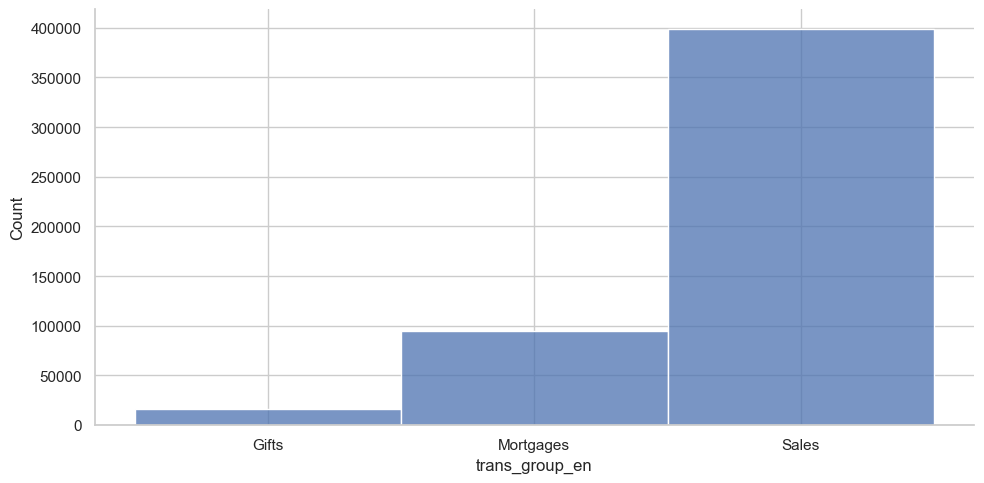

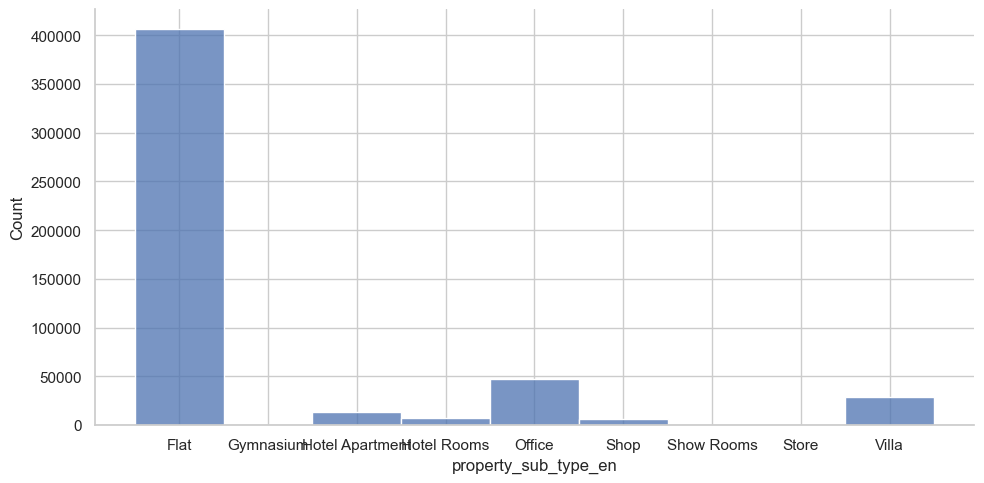

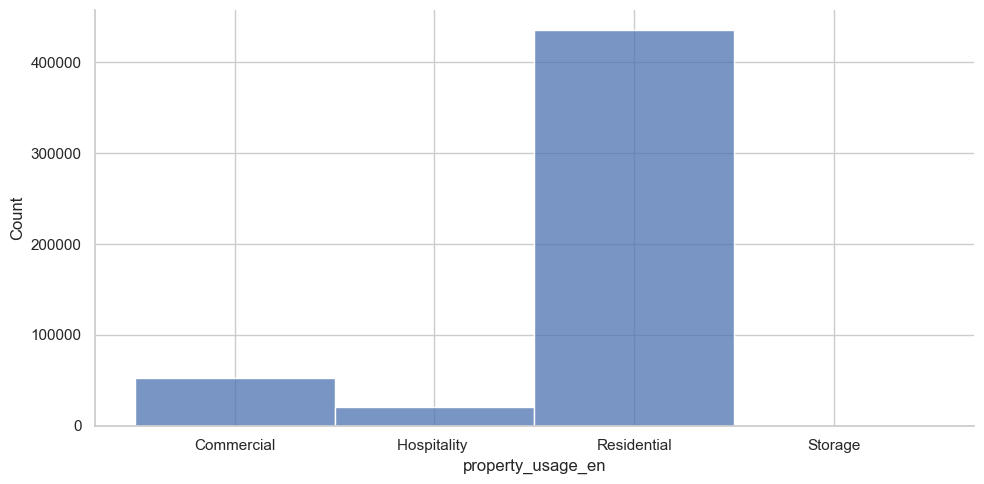

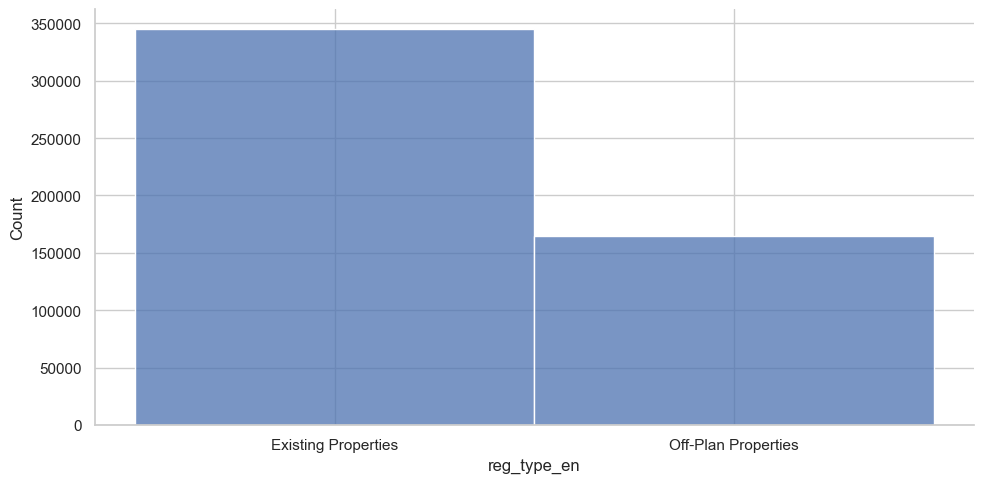

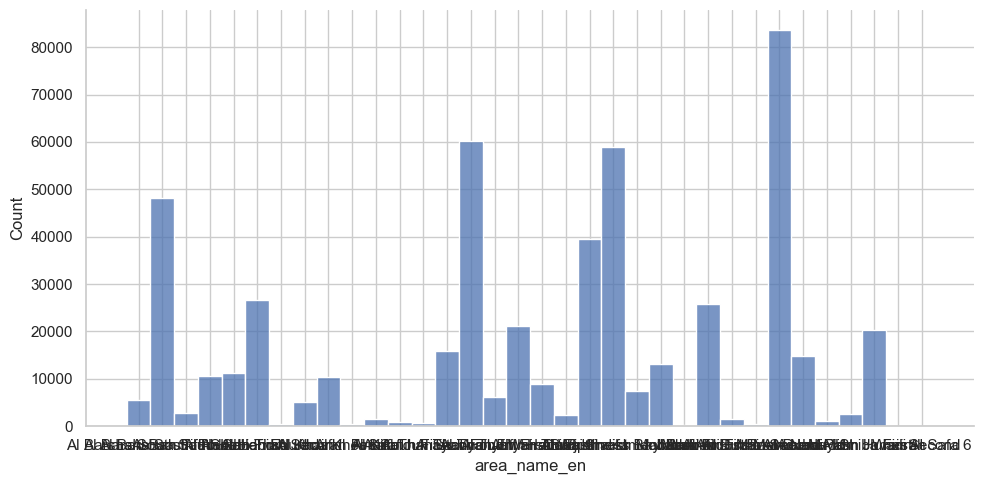

In [350]:
sns.set_style("whitegrid")

sns.displot(DF, x="actual_worth", kde=False, height=5, aspect=2)
sns.displot(DF, x="rooms_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="has_parking", kde=False, height=5, aspect=2)
sns.displot(DF, x="trans_group_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_sub_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_usage_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="reg_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="area_name_en", kde=False, height=5, aspect=2)

## 4. Регрессия и модели машинного обучения

### 4.1 Линейная регрессия


In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
DF_numeric = DF.select_dtypes(include=np.number)

In [48]:
DF_numeric

,procedure_area,actual_worth,distance_to_metro,distance_to_landmark,distance_to_mall
760,331.30,1505000.0,4775.360648,3713.843980,5177.005216
761,315.31,1260000.0,4775.360648,3713.843980,5177.005216
762,257.69,661888.0,4019.665126,4079.460028,4736.895258
763,455.83,2300000.0,4019.665126,4079.460028,4736.895258
764,455.83,1850000.0,4019.665126,4079.460028,4736.895258
...,...,...,...,...,...
1042646,61.36,600000.0,6175.706636,2261.982665,6987.171177
1042647,64.32,620000.0,6175.706636,2261.982665,6987.171177
1042648,69.57,695000.0,6175.706636,2261.982665,6987.171177
1042649,40.88,639000.0,6175.706636,2261.982665,6493.259126


In [49]:
DF_categorical = DF.select_dtypes(include='category')

In [50]:
DF_categorical

,trans_group_en,procedure_name_en,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking
760,Mortgages,Mortgage Registration,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0
761,Mortgages,Mortgage Registration,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0
762,Sales,Lease to Own Registration,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0
763,Sales,Sell,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0
764,Sales,Sell,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1042646,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Marina Mall,1 B/R,1
1042647,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Marina Mall,1 B/R,1
1042648,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Marina Mall,1 B/R,1
1042649,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Mall of the Emirates,Studio,1


In [51]:
DF_categorical_dummues = pd.get_dummies(data=DF_categorical, drop_first=True)

In [52]:
DF_categorical_dummues

,trans_group_en_Mortgages,trans_group_en_Sales,procedure_name_en_Delayed Lease to Own Modify,procedure_name_en_Delayed Lease to Own Registration,procedure_name_en_Delayed Mortgage,procedure_name_en_Delayed Sell,procedure_name_en_Delayed Sell Lease to Own Registration,procedure_name_en_Development Mortgage,procedure_name_en_Development Registration,procedure_name_en_Development Registration Pre-Registration,...,rooms_en_8 B/R,rooms_en_9 B/R,rooms_en_GYM,rooms_en_Office,rooms_en_PENTHOUSE,rooms_en_Shop,rooms_en_Single Room,rooms_en_Store,rooms_en_Studio,has_parking_1
760,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
761,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042646,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1042647,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1042648,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1042649,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [53]:
DF_for_regression = DF_numeric.join(DF_categorical_dummues)

In [54]:
DF_for_regression

,procedure_area,actual_worth,distance_to_metro,distance_to_landmark,distance_to_mall,trans_group_en_Mortgages,trans_group_en_Sales,procedure_name_en_Delayed Lease to Own Modify,procedure_name_en_Delayed Lease to Own Registration,procedure_name_en_Delayed Mortgage,...,rooms_en_8 B/R,rooms_en_9 B/R,rooms_en_GYM,rooms_en_Office,rooms_en_PENTHOUSE,rooms_en_Shop,rooms_en_Single Room,rooms_en_Store,rooms_en_Studio,has_parking_1
760,331.30,1505000.0,4775.360648,3713.843980,5177.005216,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
761,315.31,1260000.0,4775.360648,3713.843980,5177.005216,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,257.69,661888.0,4019.665126,4079.460028,4736.895258,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,455.83,2300000.0,4019.665126,4079.460028,4736.895258,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,455.83,1850000.0,4019.665126,4079.460028,4736.895258,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042646,61.36,600000.0,6175.706636,2261.982665,6987.171177,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1042647,64.32,620000.0,6175.706636,2261.982665,6987.171177,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1042648,69.57,695000.0,6175.706636,2261.982665,6987.171177,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1042649,40.88,639000.0,6175.706636,2261.982665,6493.259126,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [55]:
#X = DF_numeric.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
#Y = DF_numeric.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

X = DF_for_regression.drop(columns=['actual_worth'])
Y = DF_for_regression['actual_worth']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression

print('Intercept: ', linear_regressor.intercept_)
print('Coef: ', linear_regressor.coef_)

Intercept:  -886942.3224985288
Coef:  [ 2.67925931e+03 -1.22552987e+01 -6.52265723e+01  3.18891442e+02
 -4.98663508e+05 -3.06254448e+05  7.28949458e+05  7.15611135e+05
  5.51021949e+05  8.17850728e+05  6.78639290e+05  3.00381675e+05
  1.41091559e+04  1.58544908e+05  3.69006835e+05  2.29566958e+05
 -1.02677119e+05  3.09021283e+05 -2.28155535e+05  1.55548012e+04
  9.04501145e+05  5.93416518e+05  9.47644204e+05  6.84336510e+05
  3.55237648e+05 -4.43409456e+05  3.40149859e+05  5.09808665e+05
  7.39482153e+05  5.40058251e+05  8.98012472e+05 -5.36500135e+05
  2.62601641e+05  6.88368411e+05  6.53877957e+05 -1.23725581e+05
  1.10111665e+06  7.04190453e+05  3.79710432e+05  7.59165008e+05
  9.66356763e+04 -9.06732997e+03  2.82638171e+05  8.46468115e+04
  2.53657866e+05  5.27754511e+04  2.89817304e+05  4.37340133e+05
 -2.20935250e+05  2.00172996e+05  3.38304677e+05  1.34021241e+05
 -2.20935250e+05  4.89827469e+05 -4.00559878e+05 -3.15519655e+05
 -5.43685142e+05 -7.75378208e+05 -8.03463359e+05 -9.

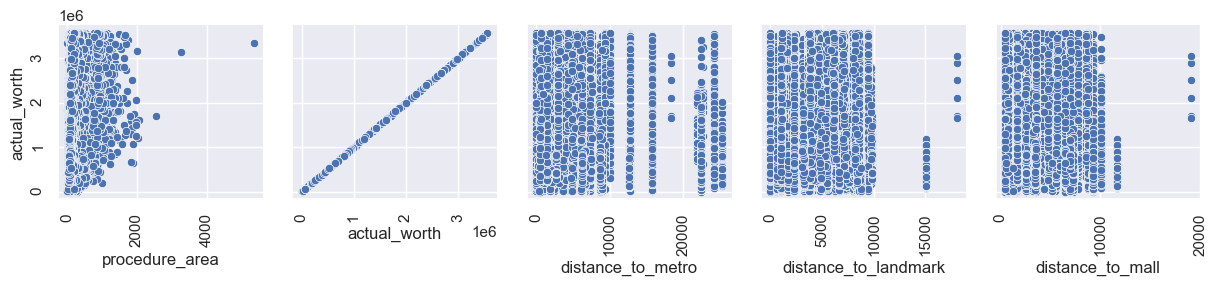

In [59]:
g = sns.PairGrid(DF_numeric, y_vars = ['actual_worth'])
g.map(sns.scatterplot)

### 4.2 Catboost
CatBoost — относительно новый алгоритм машинного обучения с открытым исходным кодом, разработанный в 2017 году компанией Яндекс. Яндекс — российский аналог Google, работающий в рамках поисковых и информационных сервисов.

Одним из основных преимуществ CatBoost является его способность интегрировать различные типы данных, такие как изображения, аудио или текстовые функции, в одну структуру. Но CatBoost также предлагает своеобразный способ обработки категориальных данных, требующий минимального преобразования категориальных признаков, в отличие от большинства других алгоритмов машинного обучения, которые не могут обрабатывать нечисловые значения. С точки зрения разработки функций преобразование нечислового состояния в числовые значения может быть очень нетривиальной и утомительной задачей, и CatBoost делает этот шаг устаревшим.

CatBoost основан на теории деревьев решений и повышения градиента.Основная идея бустинга состоит в том, чтобы последовательно объединить множество слабых моделей (модель работает немного лучше, чем случайный случай) и, таким образом, с помощью жадного поиска создать сильную конкурентную прогностическую модель.Поскольку повышение градиента соответствует деревьям решений последовательно, подобранные деревья будут учиться на ошибках прежних деревьев и, следовательно, уменьшать ошибки. Этот процесс добавления новой функции к существующим продолжается до тех пор, пока выбранная функция потерь не перестанет быть минимизированной.

In [65]:
DF.head()

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,actual_worth,distance_to_metro,distance_to_landmark,distance_to_mall
760,Mortgages,Mortgage Registration,30-03-2010,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,1505000.0,4775.360648,3713.843980,5177.005216
761,Mortgages,Mortgage Registration,26-10-2015,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,1260000.0,4775.360648,3713.843980,5177.005216
762,Sales,Lease to Own Registration,22-11-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,661888.0,4019.665126,4079.460028,4736.895258
763,Sales,Sell,22-11-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,2300000.0,4019.665126,4079.460028,4736.895258
764,Sales,Sell,01-08-2007,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,1850000.0,4019.665126,4079.460028,4736.895258


In [66]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

X = DF.drop(columns=['actual_worth', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
Y = DF['actual_worth']

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521629 entries, 760 to 1042781
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   trans_group_en        521629 non-null  category
 1   procedure_name_en     521629 non-null  category
 2   property_sub_type_en  521629 non-null  category
 3   property_usage_en     521629 non-null  category
 4   reg_type_en           521629 non-null  category
 5   area_name_en          521629 non-null  category
 6   master_project_en     521629 non-null  category
 7   rooms_en              521629 non-null  category
 8   has_parking           521629 non-null  category
 9   procedure_area        521629 non-null  float64 
 10  distance_to_metro     521629 non-null  float64 
 11  distance_to_landmark  521629 non-null  float64 
 12  distance_to_mall      521629 non-null  float64 
dtypes: category(9), float64(4)
memory usage: 40.5 MB


In [68]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Сформируем модель для регрессии
cbr = CatBoostRegressor(n_estimators=200,
                       loss_function='RMSE',
                       learning_rate=0.4,
                       depth=3, 
                       task_type='CPU',
                       random_state=1,
                       verbose=False)

# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# При помощи Pool переведем параметры в формат, подходящий для CatBoost
pool_train = Pool(x_train, y_train,
                  cat_features = [
                      'trans_group_en', 
                      'procedure_name_en', 
                      'property_sub_type_en',
                      'property_usage_en',
                      'reg_type_en',
                      'area_name_en',
                      'master_project_en',
                      'rooms_en',
                      'has_parking',
                  ])

pool_test = Pool(x_test, cat_features = [
                      'trans_group_en', 
                      'procedure_name_en', 
                      'property_sub_type_en',
                      'property_usage_en',
                      'reg_type_en',
                      'area_name_en',
                      'master_project_en',
                      'rooms_en',
                      'has_parking',
                  ])

# Проведем обучение модели
cbr.fit(pool_train)

# Проведем предсказания
y_pred = cbr.predict(pool_test)

# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)


print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 417507.81
R2: 0.70


In [69]:
Y.describe()

count    5.216290e+05
mean     1.228040e+06
std      7.590278e+05
min      1.000000e+00
25%      6.413400e+05
50%      1.038888e+06
75%      1.648565e+06
max      3.574045e+06
Name: actual_worth, dtype: float64

##### Оценка модели
Видно, что RMSE ниже стандартного отклонения, а R2 достигает 70%, что является высокими показателями. Модель эффективна.

##### Значимость переменных


In [76]:
cbr.get_feature_importance(prettified=True)

,Feature Id,Importances
0,procedure_area,45.391988
1,area_name_en,18.738726
2,distance_to_metro,9.527082
3,rooms_en,6.657209
4,master_project_en,4.347933
5,reg_type_en,3.453092
6,trans_group_en,2.807106
7,property_sub_type_en,2.035361
8,distance_to_landmark,1.957850
9,procedure_name_en,1.910690


Text(0.5, 1.0, 'CatBoost features importance:')

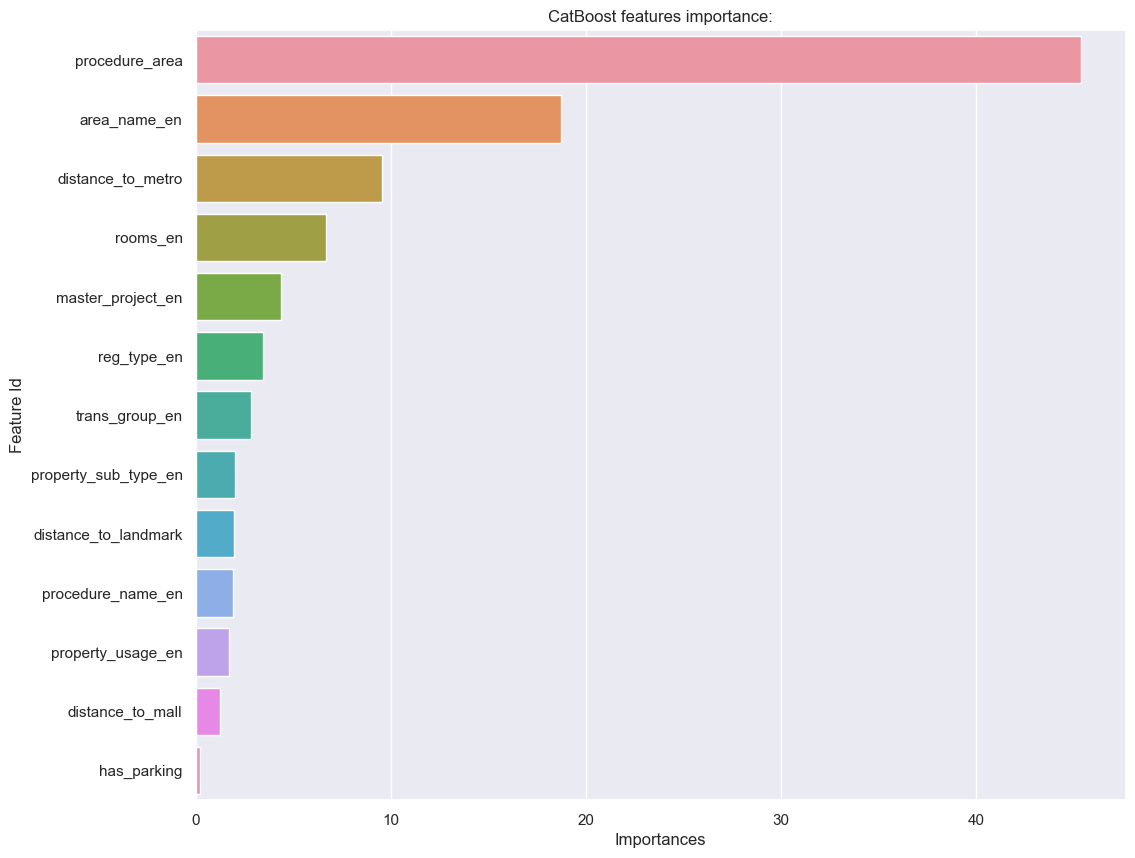

In [87]:
sorted_feature_importance = cbr.get_feature_importance(prettified=True)

plt.figure(figsize=(12, 10))
sns.barplot(x = "Importances", y = "Feature Id", data = sorted_feature_importance)
plt.title('CatBoost features importance:')

### 4.3 Neural Network на основе библиотеки Keras


In [343]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.optimizers import SGD

In [344]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

#X = DF.drop(columns=['actual_worth', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
X = DF[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']].values
Y = DF['actual_worth'].values

In [345]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [346]:
# Сформируем датасеты для тренировки модели и предсказания

#data = DF.drop(columns=['instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])

#train, test = train_test_split(data, test_size=0.2)

In [347]:
# Стандартизация числовых переменных

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


#x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])
#x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])


In [348]:
# convert the categorical variables to one-hot encoding
#x_train = pd.get_dummies(x_train, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])
#x_test = pd.get_dummies(x_test, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])

In [349]:
x_train

array([[ 0.03318042, -0.6593408 , -1.11816822, -0.59871938],
       [-0.71695531, -0.75727753,  0.94847014, -0.99897621],
       [-0.14075076,  0.43361761, -0.77351698,  1.11492799],
       ...,
       [ 0.04698448, -0.53029836,  0.83955608, -0.85906591],
       [ 1.54599055, -0.58204488,  1.04784174, -0.99897621],
       [-0.29052483,  0.43361761, -0.77351698,  1.11492799]])

In [350]:
# create the neural network model
model = Sequential()
model.add(Dense(400, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
#model.add(Dense(4, activation='softmax'))
#model.add(Dense(1))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))


In [351]:
y_train

array([1550000.,  536417.,  900000., ..., 1000000., 3491017.,  716680.])

In [352]:
# compile the model

#model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])


In [353]:
# train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
 2141/13041 [===>..........................] - ETA: 12s - loss: 39.8008 - mse: 2072810881024.0000


KeyboardInterrupt



Train: 451747840000.000, Test: 464413491200.000


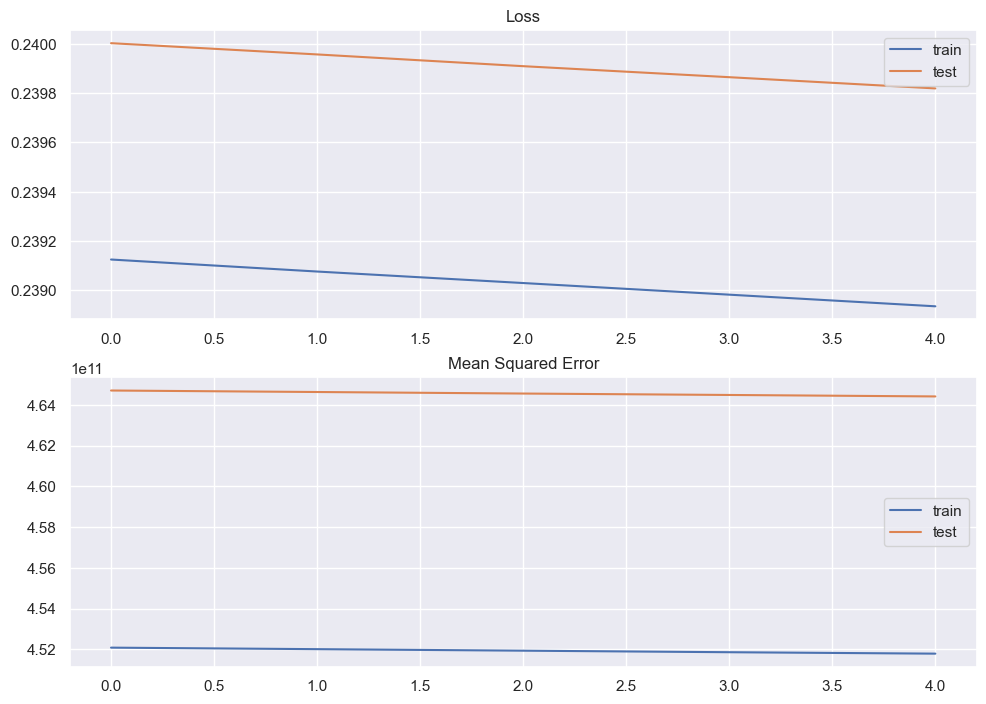

In [319]:
# evaluate the model
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

In [ ]:
# Сформируем датасеты для тренировки модели и предсказания
train, test = train_test_split(DF, test_size=0.2)

# standardize the numerical variables
scaler = StandardScaler()
train[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.fit_transform(train[['rooms_en', 'meter_sale_price', 'has_parking']])
test[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.transform(test[['rooms_en', 'meter_sale_price', 'has_parking']])

# convert the categorical variables to one-hot encoding
train = pd.get_dummies(train, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])
test = pd.get_dummies(test, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])

# create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(train.drop('actual_worth', axis=1), train['actual_worth'], epochs=100, batch_size=32, validation_split=0.2)

# evaluate the model on the test set
score = model.evaluate(test.drop('actual_worth', axis=1), test['actual_worth'], batch_size=32)

# print the mean squared error
print('Mean Squared Error:', score)